I ran the following notebook in a docker container with the following commands:

```
docker pull bethgelab/jupyter-torch:ubuntu-14.04
docker run -it -v `pwd`:/space/ -p 8888:8888 --name keras -w /space/ --rm bethgelab/jupyter-torch:ubuntu-14.04 jupyter notebook --ip=0.0.0.0
```

The following code is adapted from http://pandas.pydata.org/pandas-docs/stable/10min.html

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [87]:
import pandas as pd

In [88]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [89]:
dates = pd.date_range('20160101', periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [90]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2016-01-01,0.310158,-0.153557,-0.374387,1.466358
2016-01-02,-0.276251,0.052858,0.145504,-1.156328
2016-01-03,-0.745653,0.691147,-0.278001,0.353459
2016-01-04,0.920282,-0.129857,1.548341,2.391909
2016-01-05,-1.369652,0.006892,-1.326412,-1.132819
2016-01-06,0.329932,0.625216,1.772213,-1.302277


In [91]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["a","b","c", "d"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,a,foo
1,1.0,2013-01-02,1.0,3,b,foo
2,1.0,2013-01-02,1.0,3,c,foo
3,1.0,2013-01-02,1.0,3,d,foo


In [92]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [93]:
df.index, df.columns, df.values

(DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
                '2016-01-05', '2016-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index([u'A', u'B', u'C', u'D'], dtype='object'),
 array([[ 0.31015848, -0.1535566 , -0.37438673,  1.46635802],
        [-0.27625107,  0.05285806,  0.14550424, -1.15632829],
        [-0.74565265,  0.69114723, -0.27800086,  0.35345866],
        [ 0.92028165, -0.12985659,  1.5483414 ,  2.39190859],
        [-1.36965223,  0.00689232, -1.32641157, -1.13281863],
        [ 0.32993186,  0.62521647,  1.77221307, -1.30227674]]))

In [94]:
df2.index, df2.columns, df2.values

(Int64Index([0, 1, 2, 3], dtype='int64'),
 Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object'),
 array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'a', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'b', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'c', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'd', 'foo']], dtype=object))

In [95]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.138531,0.182117,0.247877,0.103384
std,0.830071,0.377588,1.197283,1.565154
min,-1.369652,-0.153557,-1.326412,-1.302277
25%,-0.628302,-0.095669,-0.350290,-1.150451
50%,0.016954,0.029875,-0.066248,-0.389680
75%,0.324989,0.482127,1.197632,1.188133
max,0.920282,0.691147,1.772213,2.391909


In [96]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [97]:
df.T

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00
A,0.310158,-0.276251,-0.745653,0.920282,-1.369652,0.329932
B,-0.153557,0.052858,0.691147,-0.129857,0.006892,0.625216
C,-0.374387,0.145504,-0.278001,1.548341,-1.326412,1.772213
D,1.466358,-1.156328,0.353459,2.391909,-1.132819,-1.302277


In [98]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2016-01-01,1.466358,-0.374387,-0.153557,0.310158
2016-01-02,-1.156328,0.145504,0.052858,-0.276251
2016-01-03,0.353459,-0.278001,0.691147,-0.745653
2016-01-04,2.391909,1.548341,-0.129857,0.920282
2016-01-05,-1.132819,-1.326412,0.006892,-1.369652
2016-01-06,-1.302277,1.772213,0.625216,0.329932


In [99]:
df.sort_values(by='B')

,A,B,C,D
2016-01-01,0.310158,-0.153557,-0.374387,1.466358
2016-01-04,0.920282,-0.129857,1.548341,2.391909
2016-01-05,-1.369652,0.006892,-1.326412,-1.132819
2016-01-02,-0.276251,0.052858,0.145504,-1.156328
2016-01-06,0.329932,0.625216,1.772213,-1.302277
2016-01-03,-0.745653,0.691147,-0.278001,0.353459


In [100]:
df['A']

2016-01-01    0.310158
2016-01-02   -0.276251
2016-01-03   -0.745653
2016-01-04    0.920282
2016-01-05   -1.369652
2016-01-06    0.329932
Freq: D, Name: A, dtype: float64

In [101]:
df[0:3]

,A,B,C,D
2016-01-01,0.310158,-0.153557,-0.374387,1.466358
2016-01-02,-0.276251,0.052858,0.145504,-1.156328
2016-01-03,-0.745653,0.691147,-0.278001,0.353459


In [102]:
df['20160102':'20160104']

,A,B,C,D
2016-01-02,-0.276251,0.052858,0.145504,-1.156328
2016-01-03,-0.745653,0.691147,-0.278001,0.353459
2016-01-04,0.920282,-0.129857,1.548341,2.391909


In [103]:
df.loc[dates[2]]

A   -0.745653
B    0.691147
C   -0.278001
D    0.353459
Name: 2016-01-03 00:00:00, dtype: float64

In [104]:
df.loc[:,['A','D']]

,A,D
2016-01-01,0.310158,1.466358
2016-01-02,-0.276251,-1.156328
2016-01-03,-0.745653,0.353459
2016-01-04,0.920282,2.391909
2016-01-05,-1.369652,-1.132819
2016-01-06,0.329932,-1.302277


In [105]:
df.iloc[3:5,0:2]

,A,B
2016-01-04,0.920282,-0.129857
2016-01-05,-1.369652,0.006892


In [106]:
df[df.A > 0.5]

,A,B,C,D
2016-01-04,0.920282,-0.129857,1.548341,2.391909


In [107]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2016-01-01,0.310158,-0.153557,-0.374387,1.466358,one
2016-01-02,-0.276251,0.052858,0.145504,-1.156328,one
2016-01-03,-0.745653,0.691147,-0.278001,0.353459,two
2016-01-04,0.920282,-0.129857,1.548341,2.391909,three
2016-01-05,-1.369652,0.006892,-1.326412,-1.132819,four
2016-01-06,0.329932,0.625216,1.772213,-1.302277,three


In [108]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2016-01-03,-0.745653,0.691147,-0.278001,0.353459,two
2016-01-05,-1.369652,0.006892,-1.326412,-1.132819,four


In [109]:
df['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20160101', periods=6))
df

,A,B,C,D,F
2016-01-01,0.310158,-0.153557,-0.374387,1.466358,1
2016-01-02,-0.276251,0.052858,0.145504,-1.156328,2
2016-01-03,-0.745653,0.691147,-0.278001,0.353459,3
2016-01-04,0.920282,-0.129857,1.548341,2.391909,4
2016-01-05,-1.369652,0.006892,-1.326412,-1.132819,5
2016-01-06,0.329932,0.625216,1.772213,-1.302277,6


In [110]:
df.at[dates[0],'A'] = 0.456
df.at[dates[0],'A']

0.45600000000000002

In [111]:
df.iat[0,1] = 0.123
df.iat[0,1]

0.123

In [112]:
df.loc[:,'D'] = np.array([5] * len(df))
df.loc[:,'D']

2016-01-01    5
2016-01-02    5
2016-01-03    5
2016-01-04    5
2016-01-05    5
2016-01-06    5
Freq: D, Name: D, dtype: int64

In [113]:
df.loc[:,'B':'D'] = np.random.randn(len(df), 3)
df.loc[:,'B':'D']

,B,C,D
2016-01-01,-0.611456,0.237845,-0.377786
2016-01-02,-0.076085,-1.416068,-0.285155
2016-01-03,-2.386426,-1.845182,-1.134009
2016-01-04,-1.242530,0.700056,0.559862
2016-01-05,1.188112,-0.115369,-0.358667
2016-01-06,0.572091,-0.088437,-0.003680


In [114]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[:, 'E'] = np.random.randn(len(df1))
df1

,A,B,C,D,F,E
2016-01-01,0.456000,-0.611456,0.237845,-0.377786,1,-0.577572
2016-01-02,-0.276251,-0.076085,-1.416068,-0.285155,2,-1.642487
2016-01-03,-0.745653,-2.386426,-1.845182,-1.134009,3,0.926069
2016-01-04,0.920282,-1.242530,0.700056,0.559862,4,-0.865166


In [115]:
df1.iloc[1,5] = np.nan
df1.dropna(how='any')

,A,B,C,D,F,E
2016-01-01,0.456000,-0.611456,0.237845,-0.377786,1,-0.577572
2016-01-03,-0.745653,-2.386426,-1.845182,-1.134009,3,0.926069
2016-01-04,0.920282,-1.242530,0.700056,0.559862,4,-0.865166


In [116]:
df1.iloc[1,5] = np.nan
df1.fillna(value=5)

,A,B,C,D,F,E
2016-01-01,0.456000,-0.611456,0.237845,-0.377786,1,-0.577572
2016-01-02,-0.276251,-0.076085,-1.416068,-0.285155,2,5.000000
2016-01-03,-0.745653,-2.386426,-1.845182,-1.134009,3,0.926069
2016-01-04,0.920282,-1.242530,0.700056,0.559862,4,-0.865166


In [117]:
pd.isnull(df1)

,A,B,C,D,F,E
2016-01-01,False,False,False,False,False,False
2016-01-02,False,False,False,False,False,True
2016-01-03,False,False,False,False,False,False
2016-01-04,False,False,False,False,False,False


In [118]:
df.median()

A    0.026840
B   -0.343770
C   -0.101903
D   -0.321911
F    3.500000
dtype: float64

In [119]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2016-01-01    NaN
2016-01-02    NaN
2016-01-03    1.0
2016-01-04    3.0
2016-01-05    5.0
2016-01-06    NaN
Freq: D, dtype: float64

In [120]:
df.sub(s, axis='index')

,A,B,C,D,F
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,-1.745653,-3.386426,-2.845182,-2.134009,2.0
2016-01-04,-2.079718,-4.242530,-2.299944,-2.440138,1.0
2016-01-05,-6.369652,-3.811888,-5.115369,-5.358667,0.0
2016-01-06,NaN,NaN,NaN,NaN,NaN


In [121]:
df.apply(np.cumsum)

,A,B,C,D,F
2016-01-01,0.456000,-0.611456,0.237845,-0.377786,1
2016-01-02,0.179749,-0.687541,-1.178223,-0.662941,3
2016-01-03,-0.565904,-3.073967,-3.023405,-1.796950,6
2016-01-04,0.354378,-4.316497,-2.323349,-1.237088,10
2016-01-05,-1.015274,-3.128385,-2.438718,-1.595754,15
2016-01-06,-0.685342,-2.556294,-2.527155,-1.599435,21


In [122]:
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a,axis=0)      # sum over rows for each of the 3 columns

array([[1, 2, 3],
       [5, 7, 9]])

In [123]:
np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows

array([[ 1,  3,  6],
       [ 4,  9, 15]])

In [124]:
df.apply(lambda x: (x.max(),  x.min()))

A    (0.920281647433, -1.36965222911)
B      (1.1881124348, -2.38642643299)
C    (0.700055962552, -1.84518245383)
D    (0.559861972568, -1.13400901485)
F                          (6.0, 1.0)
dtype: object

In [125]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

5    3
4    2
6    1
3    1
2    1
1    1
0    1
dtype: int64

In [126]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [127]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [128]:
s.str.cat()

'ABCAabaBacaCABAdogcat'

In [129]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,0.044367,-1.625470,-0.323064,2.079471
1,0.515908,-0.738997,1.478010,-1.684302
2,0.562990,2.020849,-0.593258,0.998726


In [130]:
pd.concat(pieces)

,0,1,2,3
0,0.044367,-1.625470,-0.323064,2.079471
1,0.515908,-0.738997,1.478010,-1.684302
2,0.562990,2.020849,-0.593258,0.998726
3,1.054306,-1.337744,-0.487481,0.237558
4,0.222867,-0.295084,1.493707,1.820170
5,0.897080,1.558974,-0.027791,1.318167
6,-0.504542,-1.059774,0.057064,1.358457
7,-0.039305,-0.516386,-0.752267,-0.531960
8,0.544613,0.699029,0.662575,0.323468
9,1.184127,-0.778851,-0.751887,-1.148787


In [131]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [132]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [133]:
left = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
joined = pd.merge(left, right, on='key')
joined

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,3,4
3,foo,3,6
4,bar,2,5


In [134]:
joined[joined.key == 'foo'].lval.sum()

8

In [135]:
joined.groupby(by='key').sum()

,lval,rval
key,,
bar,2,5
foo,8,20


In [136]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.674956,0.506971,-0.570779,-0.168775
1,-0.321831,0.856492,1.479228,0.698344
2,0.741185,0.037454,-0.250636,0.445281
3,0.849220,-0.685573,1.307718,-1.253472
4,0.984932,1.147259,-0.346372,0.277340
5,0.758560,-0.556662,-0.416168,1.281851
6,-0.004821,1.653382,0.465933,-0.072901
7,-0.067999,0.397021,1.134572,-1.274971
8,0.849220,-0.685573,1.307718,-1.253472


In [137]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

In [138]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.901276 -2.158620
    three  1.023079 -0.792611
    two    0.379493  1.583100
foo one    0.605030  1.477036
    three  0.740088 -0.568709
    two    1.131100 -1.264255

In [139]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                       'foo', 'foo', 'qux', 'qux'],
                      ['one', 'two'] * 4]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [140]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [141]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.661623 -0.507780
      two    -1.592845  1.031822
baz   one    -0.728565  0.540320
      two    -0.261689  1.903131
foo   one    -0.509736 -1.477628
      two     0.048603  1.891704
qux   one     1.115103  0.828671
      two     0.386188 -0.742027

In [142]:
df.loc['foo', 'one']

A   -0.509736
B   -1.477628
Name: (foo, one), dtype: float64

In [143]:
df.loc['foo', :].A

second
one   -0.509736
two    0.048603
Name: A, dtype: float64

In [144]:
df2 = df[:4]
stacked = df2.stack()

In [145]:
stacked.unstack()

A         B
first second                    
bar   one    -1.661623 -0.507780
      two    -1.592845  1.031822
baz   one    -0.728565  0.540320
      two    -0.261689  1.903131

In [146]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.661623 -0.728565
       B -0.507780  0.540320
two    A -1.592845 -0.261689
       B  1.031822  1.903131

In [147]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.661623 -1.592845
      B -0.507780  1.031822
baz   A -0.728565 -0.261689
      B  0.540320  1.903131

In [148]:
stacked.unstack(2)

A         B
first second                    
bar   one    -1.661623 -0.507780
      two    -1.592845  1.031822
baz   one    -0.728565  0.540320
      two    -0.261689  1.903131

In [149]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['A', 'B', 'C'] * 4,
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.802667,-0.016189
1,one,B,foo,-0.839478,0.862039
2,two,C,foo,0.203088,-0.204244
3,three,A,bar,-0.980983,-0.525151
4,one,B,bar,1.052097,-0.949383
5,one,C,bar,-1.030360,-0.776512
6,two,A,foo,-0.135708,-1.294469
7,three,B,foo,-1.693130,1.037847
8,one,C,foo,1.216128,0.086280
9,one,A,bar,0.833042,-0.074777


In [150]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.833042  0.802667
      B  1.052097 -0.839478
      C -1.030360  1.216128
three A -0.980983       NaN
      B       NaN -1.693130
      C -1.673946       NaN
two   A       NaN -0.135708
      B  1.502189       NaN
      C       NaN  0.203088

In [151]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                         'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                         'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [152]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True)
table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [153]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [154]:
rng = pd.date_range('1/1/2016', periods=100, freq='S')
rng[50]

Timestamp('2016-01-01 00:00:50', offset='S')

In [155]:
len(rng)

100

In [156]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2016-01-01 00:00:00    117
2016-01-01 00:00:01    123
2016-01-01 00:00:02     39
2016-01-01 00:00:03    291
2016-01-01 00:00:04     86
Freq: S, dtype: int64

In [157]:
ts5 = ts.resample('5Min')

In [158]:
ts5.count()

2016-01-01    100
Freq: 5T, dtype: int64

In [159]:
ts5.median()

2016-01-01    269.5
Freq: 5T, dtype: float64

In [160]:
ts.asfreq('10T')

2016-01-01    117
Freq: 10T, dtype: int64

In [161]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [162]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [163]:
df["grade"].cat.categories = ["good", "normal", "bad"]
df

,id,raw_grade,grade
0,1,a,good
1,2,b,normal
2,3,b,normal
3,4,a,good
4,5,a,good
5,6,e,bad


In [164]:
df.groupby("grade").size()

grade
good      3
normal    2
bad       1
dtype: int64

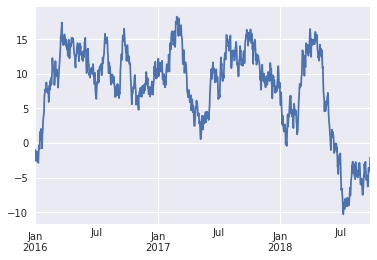

In [165]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))
ts = ts.cumsum()
ts.plot()

In [166]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])

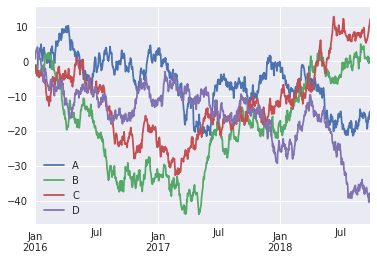

In [167]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [168]:
df.to_csv('/tmp/foo.csv')

In [169]:
pd.read_csv('/tmp/foo.csv')

,Unnamed: 0,A,B,C,D
0,2016-01-01,-1.752802,-1.466141,-1.639292,0.762445
1,2016-01-02,-1.654371,-2.755518,-1.060659,2.047843
2,2016-01-03,-2.509179,-3.532787,-2.663614,2.859662
3,2016-01-04,-1.746810,-1.368064,-2.205940,3.469641
4,2016-01-05,-1.663305,-1.020064,-2.392186,3.422230
5,2016-01-06,-3.352768,-2.357151,-3.923516,3.553398
6,2016-01-07,-2.701273,-4.269701,-2.437190,4.063266
7,2016-01-08,-1.815819,-3.368160,-3.632567,4.119123
8,2016-01-09,1.806301,-3.552281,-2.640997,1.668949
9,2016-01-10,2.012933,-3.202326,-3.506352,1.998632


In [170]:
 df.to_hdf('/tmp/foo.h5','df')

ImportError: HDFStore requires PyTables, "No module named tables" problem importing